In [1]:
%matplotlib inline
import matplotlib.pyplot as plot
from networkx.algorithms import traversal
import pandas as pd

/Users/alexandersatz/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
df = pd.read_csv('/Users/alexandersatz/Documents/Cuny/IS620/IS620_proj2_net.csv')

In [4]:
df[:5]

,Source,Target,Weight
0,Nat Methods,Adv Exp Med Biol,3
1,Nat Methods,Sci Rep,37
2,Nat Methods,Oncogene,2
3,Nat Methods,Mol Cell,3
4,Nat Methods,PLoS Genet,1


In [5]:
import networkx as nx
mygraph2 = nx.from_pandas_dataframe(df, 'Source', 'Target',['Weight'], create_using=nx.DiGraph())

In [9]:
print (mygraph2.number_of_edges())
print (mygraph2.number_of_nodes())

30384
604


In [10]:
#nx.draw_spring(mygraph2, with_labels=True, node_size=6)
#this is a large number of edges and nodes to visualize

In [11]:
##Many authors submit in Plos One and Sci Rep, 
##and these same authers tend to also submit in the many other journals.

import operator
ei = nx.eigenvector_centrality(mygraph2, max_iter=100000, tol=1e-06, nstart=None, weight='Weight')
dict(sorted(ei.iteritems(), key=operator.itemgetter(1), reverse=True)[:10])

{'Cell': 0.18280632443143294,
 'Cell Res': 0.18620230260785556,
 'Nat Biotechnol': 0.18621988449028867,
 'Nat Commun': 0.22057830124107797,
 'Nature': 0.21239285036222813,
 'Nucleic Acids Res': 0.28626899406290657,
 'PLoS One': 0.323888854323424,
 'Proc Natl Acad Sci U S A': 0.2401590923855716,
 'RNA Biol': 0.1656188647878041,
 'Sci Rep': 0.37542486951026566}

In [12]:
#The top two are the same for degree centrality and eigenvector centrality
dc = nx.degree_centrality(mygraph2)  #note this does not take into account Weights
dict(sorted(dc.iteritems(), key=operator.itemgetter(1), reverse=True)[:10])

{'Cell': 0.9121061359867331,
 'Cell Res': 0.9121061359867331,
 'Nat Biotechnol': 0.9519071310116086,
 'Nat Commun': 1.0746268656716418,
 'Nature': 0.988391376451078,
 'Nucleic Acids Res': 1.1276948590381426,
 'Oncotarget': 0.9154228855721394,
 'PLoS One': 1.2504145936981759,
 'Proc Natl Acad Sci U S A': 1.1011608623548923,
 'Sci Rep': 1.2338308457711442}

A Newman project for this data would make little sense.  It would preferentially weight situations where journals are connected to fewer other journals...

In [19]:
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['Weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2

In [92]:
def island_method(g, iterations=5):
    weights= [edata['Weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx= 100 #int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step= 5 #int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [93]:
islands=island_method(mygraph2)

The island methods are largely taken from the book, however the book has a typo with regard to connencted subgraphs; these objects have no length, but instead need to be converted to lists first.  I've also adjusted the step and the max, as the number of islands quickly drops.


The technique shows that removing all edges with weight of 1 leaves 485 nodes over 3 subgraphs.

In [94]:
for i in islands:
    # print the threshold level, size of the graph, and number of connected components
    print i[0], len(i[1]), len(list(nx.connected_component_subgraphs(i[1])))

1 485 3
6 192 2
11 96 2
16 56 1
21 41 1
26 31 1
31 27 1
36 21 1
41 18 1
46 14 1
51 12 1
56 10 1
61 10 2
66 8 1
71 6 1
76 5 1
81 3 1
86 3 1
91 3 1
96 2 1


The 3 islands with threshold of 1, are  not terribly interesting.  As shown below, the first island has 481 nodes (too many) and the other two only have 2 nodes each (too few)

In [88]:
island_list = (list(nx.connected_component_subgraphs(islands[0][1])))
print len(island_list[0])

481


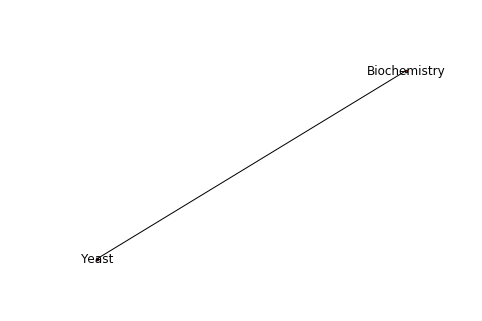

In [86]:
nx.draw_spring(island_list[1], with_labels=True, node_size=6)

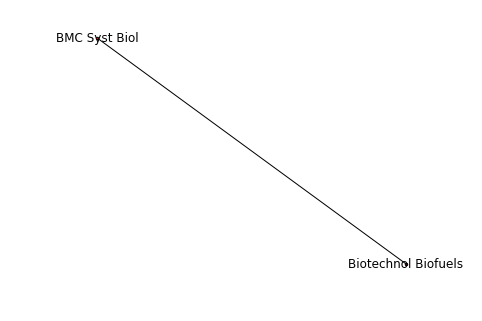

In [87]:
nx.draw_spring(island_list[2], with_labels=True, node_size=6)

In [95]:
island_list = (list(nx.connected_component_subgraphs(islands[11][1])))
print len(island_list[0])

10


Now I have set the weigth threshold at 61, which leaves me with 1 island and 10 nodes (a manageble number to plot).  As shown below, we see SciRep and Nucleic Acis Res as the most connected.  This makes sense, as these are secondary journals, easier to publish in, and in more or less the correct specialty area.  

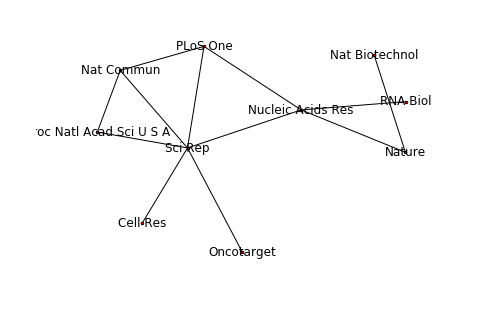

In [96]:
nx.draw_spring(island_list[0], with_labels=True, node_size=6)